In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [19]:
!mkdir -p network_file
!cd network_file/ && curl -O 'https://complexnetworks.eu-central-1.linodeobjects.com/polblogs.gml'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  954k  100  954k    0     0  1422k      0 --:--:-- --:--:-- --:--:-- 1427k


In [2]:
G = nx.read_gml('network_file/polblogs.gml', label='label')
G = nx.MultiDiGraph(G)

# Network Generals

In [5]:
print(nx.adjacency_matrix(G))

  (0, 1)	1
  (0, 20)	1
  (0, 22)	1
  (0, 54)	1
  (0, 67)	1
  (0, 84)	1
  (0, 114)	1
  (0, 154)	1
  (0, 189)	1
  (0, 240)	1
  (0, 255)	1
  (0, 256)	1
  (0, 322)	1
  (0, 366)	1
  (0, 433)	1
  (0, 482)	1
  (0, 497)	1
  (0, 567)	1
  (0, 574)	1
  (0, 640)	1
  (0, 641)	1
  (0, 643)	2
  (0, 663)	1
  (0, 1130)	1
  (0, 1244)	1
  :	:
  (1486, 1269)	1
  (1486, 1286)	1
  (1486, 1365)	1
  (1486, 1434)	1
  (1486, 1436)	1
  (1487, 1488)	1
  (1488, 774)	2
  (1488, 853)	1
  (1488, 854)	2
  (1488, 957)	1
  (1488, 962)	1
  (1488, 965)	1
  (1488, 999)	2
  (1488, 1007)	1
  (1488, 1008)	1
  (1488, 1023)	1
  (1488, 1036)	2
  (1488, 1125)	1
  (1488, 1345)	1
  (1488, 1363)	1
  (1488, 1420)	1
  (1488, 1436)	1
  (1488, 1437)	1
  (1488, 1487)	1
  (1489, 801)	1


In [6]:
n_nodes = len(set(G.nodes))
n_edges = len(G.edges)

print(f'The graph has {n_nodes} nodes and {n_edges} edges.')

The graph has 1490 nodes and 38177 edges.


In [7]:
liberals = list( n for n,d in G.nodes().items() if d['value'] == 0)
conservatives = list( n for n,d in G.nodes().items() if d['value'] == 1)

In [8]:
pct_liberals = round(len(liberals)*100/n_nodes, 2)
pct_conservatives = round(len(conservatives)*100/n_nodes, 2)

print(f'The graph contains {pct_liberals} % of liberal sites and {pct_conservatives} % of concervative sites')

The graph contains 50.87 % of liberal sites and 49.13 % of concervative sites


# Microscale

## Degree Analysis

In [9]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
degree_sequence_names = sorted((n for n, d in G.degree()), reverse=True)
degree_dict = dict(sorted(dict(G.degree()).items(), key=lambda x: x[1], reverse=True))
dmax = max(degree_sequence)

list(degree_dict.keys())[:10]

['blogsforbush.com',
 'dailykos.com',
 'instapundit.com',
 'atrios.blogspot.com',
 'talkingpointsmemo.com',
 'washingtonmonthly.com',
 'drudgereport.com',
 'powerlineblog.com',
 'michellemalkin.com',
 'hughhewitt.com']

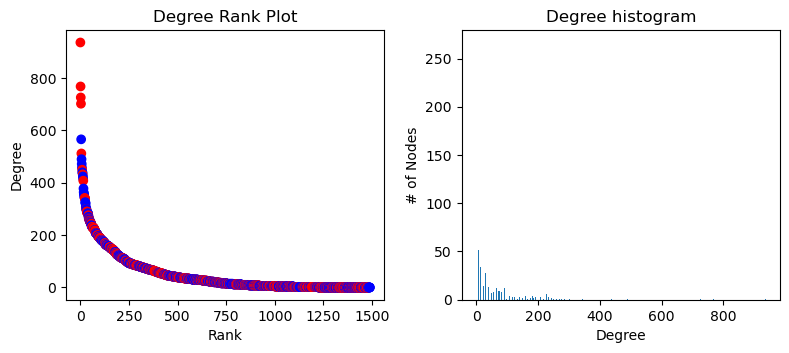

In [10]:
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

colors = [ "blue" if i in liberals else "red" for i in degree_sequence_names]
ax1 = fig.add_subplot(axgrid[3:, :2])
x = list(np.arange(0, len(degree_sequence), 1))
ax1.scatter(x, degree_sequence, s=None, marker="o", c=colors)
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

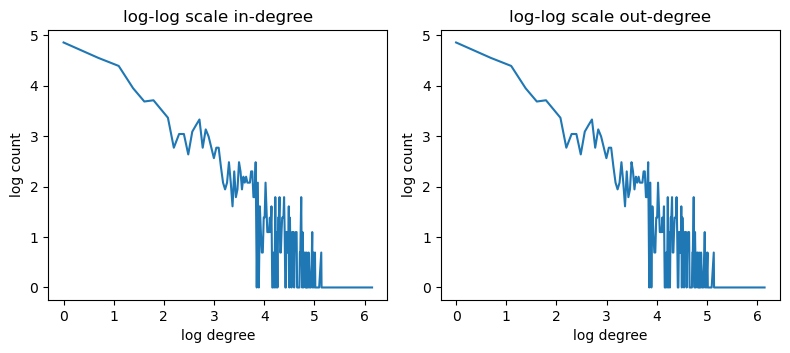

In [11]:
degree_sequence_in = sorted((d for n, d in G.in_degree()), reverse=True)
degree_sequence_out = sorted((d for n, d in G.out_degree()), reverse=True)


fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
x_in = np.unique(np.log(degree_sequence_in), return_counts=False)
y_in = np.log(np.unique(np.log(degree_sequence_in), return_counts=True)[1])
ax1.plot(x_in, y_in)
ax1.set_title("log-log scale in-degree")
ax1.set_ylabel("log count")
ax1.set_xlabel("log degree")

ax2 = fig.add_subplot(axgrid[3:, 2:])
x_out = np.unique(np.log(degree_sequence_out), return_counts=False)
y_out = np.log(np.unique(np.log(degree_sequence_out), return_counts=True)[1])
ax2.plot(x_out, y_out)
ax2.set_title("log-log scale out-degree")
ax2.set_ylabel("log count")
ax2.set_xlabel("log degree")

fig.tight_layout()
#print(f'Average in-degree exponent: {np.polyfit(x_in, y_in, 1)[0]}')
#print(f'Average out-degree exponent: {np.polyfit(x_out, y_out, 1)[0]}')
plt.show()

## Page Rank

In [13]:
page_rank = dict(sorted(nx.pagerank(G).items(), key=lambda item: item[1], reverse=True))

list(page_rank.keys())[:10]

['blogsforbush.com',
 'dailykos.com',
 'instapundit.com',
 'drudgereport.com',
 'atrios.blogspot.com',
 'talkingpointsmemo.com',
 'gevkaffeegal.typepad.com/the_alliance',
 'powerlineblog.com',
 'washingtonmonthly.com',
 'michellemalkin.com']

In [14]:
conservatives_in_top_10 = len(list(filter(lambda x: x in conservatives, list(page_rank.keys())[:10])))
liberals_in_top_10 = len(list(filter(lambda x: x in liberals, list(page_rank.keys())[:10])))

print(f'Out of the top 10 pages by degree centrality, {liberals_in_top_10*10} % are liberals \
       and {conservatives_in_top_10*10} % are conservatives')


conservatives_in_top_50 = len(list(filter(lambda x: x in conservatives, list(page_rank.keys())[10:50])))
liberals_in_top_50 = len(list(filter(lambda x: x in liberals, list(page_rank.keys())[10:50])))

print(f'Out of the top 50 pages by degree centrality, {round(liberals_in_top_50*100/40, 2)} % are liberals \
       and {round(conservatives_in_top_50*100/40, 2)} % are conservatives')


conservatives_in_top_100 = len(list(filter(lambda x: x in conservatives, list(page_rank.keys())[50:100])))
liberals_in_top_100 = len(list(filter(lambda x: x in liberals, list(page_rank.keys())[50:100])))

print(f'Out of the top 100 pages by degree centrality, {round(liberals_in_top_100*100/50, 2)} % are liberals \
       and {round(conservatives_in_top_100*100/50, 2)} % are conservatives')

conservatives_in_top_500 = len(list(filter(lambda x: x in conservatives, list(page_rank.keys())[100:1000])))
liberals_in_top_500 = len(list(filter(lambda x: x in liberals, list(page_rank.keys())[100:1000])))

print(f'Out of the top 500 pages by degree centrality, {liberals_in_top_500*100/400} % are liberals \
       and {conservatives_in_top_500*100/400} % are conservatives')


Out of the top 10 pages by degree centrality, 40 % are liberals        and 60 % are conservatives
Out of the top 50 pages by degree centrality, 55.0 % are liberals        and 45.0 % are conservatives
Out of the top 100 pages by degree centrality, 52.0 % are liberals        and 48.0 % are conservatives
Out of the top 500 pages by degree centrality, 104.25 % are liberals        and 120.75 % are conservatives


## Closeness Centrality

In [63]:
G_liberals = G.subgraph(liberals)
G_conservatives = G.subgraph(conservatives)

In [16]:
def compare_histograms(scores1, scores2, title, label1='Conservatives', label2='Liberals'):
    plt.figure(figsize=(7,5))
    plt.hist(scores1, histtype='step', label=label1, density=True, color='red')
    plt.hist(scores2, histtype='step', label=label2, density=True, color='blue')
    plt.legend(loc='upper right', fontsize='x-large')
    plt.ylabel('Probability')
    plt.xlabel(title)
    plt.show()

In [17]:
closeness_liberals = nx.closeness_centrality(G_liberals)
closeness_conservatives = nx.closeness_centrality(G_conservatives)

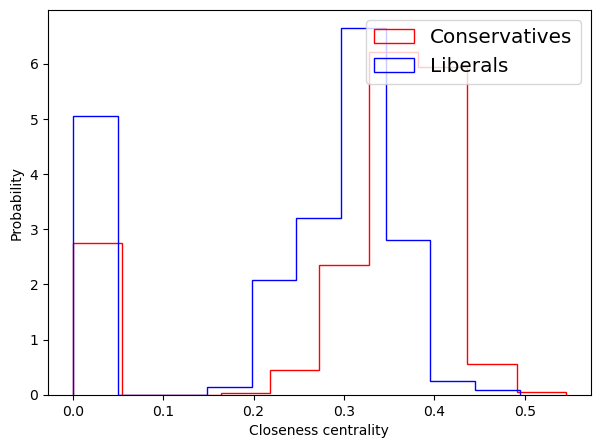

In [18]:
compare_histograms(closeness_conservatives.values(), closeness_liberals.values(), 'Closeness centrality')

## Clustering

In [19]:
G_liberals = nx.Graph(G_liberals)
G_conservatives = nx.Graph(G_conservatives)

In [20]:
clustering_liberals = nx.clustering(G_liberals)
clustering_conservatives = nx.clustering(G_conservatives)

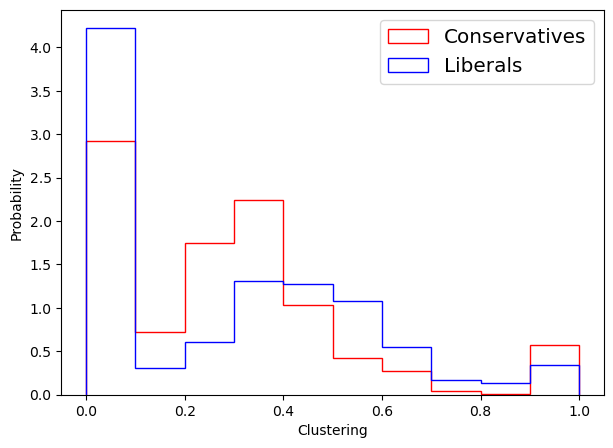

In [21]:

compare_histograms(clustering_conservatives.values(), clustering_liberals.values(), 'Clustering')

# Macro Scale

## Average Clustering

<AxesSubplot: >

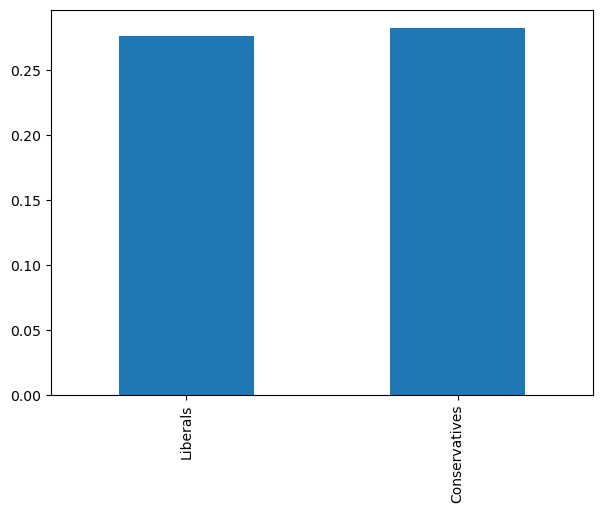

In [22]:
df_clusering = pd.DataFrame([nx.average_clustering(G_liberals), nx.average_clustering(G_conservatives)])
df_clusering.columns = ["AVG Clustering"]
df_clusering.index = ['Liberals', 'Conservatives']
df_clusering.plot(kind='bar',figsize=(7, 5), legend=None)

## Transitivity

<AxesSubplot: >

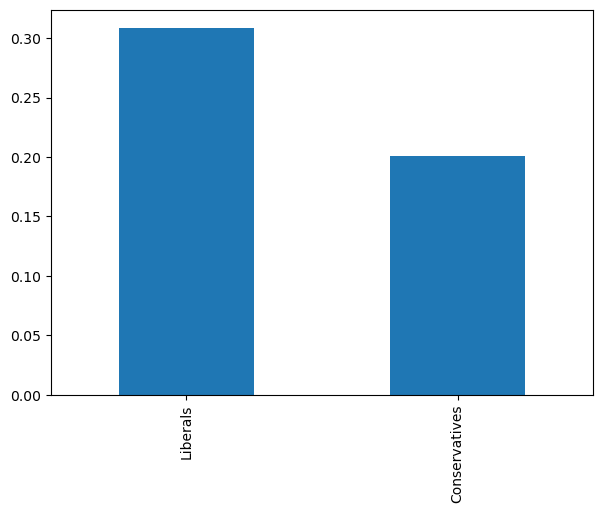

In [23]:
df_transitivity = pd.DataFrame([nx.transitivity(G_liberals), nx.transitivity(G_conservatives)])
df_transitivity.columns = ["Transitiviy"]
df_transitivity.index = ['Liberals', 'Conservatives']
df_transitivity.plot(kind='bar',figsize=(7, 5), legend=None)

## Models

In [24]:
BG = nx.barabasi_albert_graph(len(set(G.nodes)), 1, seed=None, initial_graph=None)

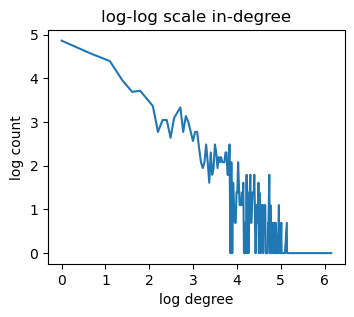

In [25]:
degree_sequence = sorted((d for n, d in BG.degree()), reverse=True)


fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
x_in = np.unique(np.log(degree_sequence_in), return_counts=False)
y_in = np.log(np.unique(np.log(degree_sequence_in), return_counts=True)[1])
ax1.plot(x_in, y_in)
ax1.set_title("log-log scale in-degree")
ax1.set_ylabel("log count")
ax1.set_xlabel("log degree")

plt.show()

## Communities

In [26]:
communities = nx.community.louvain_communities(G, weight='weight', resolution=0.1, threshold=1e-07)

In [27]:
resolutions = sorted([i/10 for i in range(1, 21)], reverse=True)

for resolution in resolutions:
    communities = nx.community.louvain_communities(G, weight='weight', resolution=resolution, threshold=1e-07)

    print(f'Resolution {resolution} gives {len(communities)} communities with an average size of {np.mean([len(c) for c in communities])}')

Resolution 2.0 gives 334 communities with an average size of 4.461077844311378
Resolution 1.9 gives 334 communities with an average size of 4.461077844311378
Resolution 1.8 gives 336 communities with an average size of 4.434523809523809
Resolution 1.7 gives 338 communities with an average size of 4.408284023668639
Resolution 1.6 gives 327 communities with an average size of 4.556574923547401
Resolution 1.5 gives 325 communities with an average size of 4.584615384615384
Resolution 1.4 gives 312 communities with an average size of 4.7756410256410255
Resolution 1.3 gives 321 communities with an average size of 4.641744548286605
Resolution 1.2 gives 306 communities with an average size of 4.869281045751634
Resolution 1.1 gives 306 communities with an average size of 4.869281045751634
Resolution 1.0 gives 297 communities with an average size of 5.016835016835016
Resolution 0.9 gives 294 communities with an average size of 5.068027210884353
Resolution 0.8 gives 290 communities with an averag

# Experiments

## Attacks

In [233]:
from pydantic import BaseModel
import matplotlib

class Network(BaseModel):
    name: str
    network: nx.Graph
    next_network: nx.Graph = None
    timesatmp: int = 0
    alpha: float = 1.
    dt: float = 0.01
    degree_dict: dict = {}
    degree_sequence: list[int] = []
    ordered_degree: dict = {}
    connected_components: float = 0.0
    class Config:
        arbitrary_types_allowed = True

    def nodes_to_remove(self, n, random=True):
        if random:
            return np.random.choice(list(self.network.nodes), n, replace=False)
        else:
            return list(self.ordered_degree.keys())[:n]
    
    def initialize(self):
        self.network.pos = nx.spring_layout(self.network)
        theta = 2 * np.pi * np.random.rand()
        omega = 2 * np.pi * np.random.rand()
        nx.set_node_attributes(self.network, theta, 'theta')
        nx.set_node_attributes(self.network, omega, 'omega')
        self.next_network = self.network.copy()

    def visualize(self):
        plt.figure(figsize=(8, 8))
        plt.axis('off')
        ax = 1,
            
        nx.draw(
            self.network,
            #pos=self.network.pos,
            node_color=[
                np.sin(self.network.nodes[v]['theta']) 
                for v in self.network.nodes
                ],
            cmap=plt.cm.hsv,
            node_size=100,
            alpha=0.8
        )
        plt.show()

    def update(self):
        for i in self.network.nodes:
            self.next_network.nodes[i]['theta'] = (
                self.network.nodes[i]['theta'] + (
                    self.network.nodes[i]['omega'] + self.alpha * (
                        np.sum([
                            np.sin(self.network.nodes[j]['theta'] - 
                                   self.network.nodes[i]['theta']) 
                                   for j in self.network.neighbors(i)
                        ]) / self.network.degree(i) * self.dt
                    )))
        self.network, self.next_network = self.next_network, self.network

        
    def _degree_sequence(self):
        return sorted((
            d for n, d in self.network.degree()
            ), reverse=True)
    def _ordered_degree(self):
        return dict(sorted(
            self.degree_dict.items(), 
            key=lambda item: item[1], 
            reverse=True
            ))
    def _degree_dict(self):
        return dict(self.network.degree())
    def _connected_components(self):
        return len([
            i for i in 
            nx.connected_components(
                nx.Graph(self.network)
            )])
    def compute_metrics(self):
        self.degree_dict = self._degree_dict()
        self.degree_sequence = self._degree_sequence()
        self.ordered_degree = self._ordered_degree()
        self.connected_components = self._connected_components()

    def remove_nodes(self, n, random=True):
        nodes = self.nodes_to_remove(n, random=random)
        self.network.remove_nodes_from(nodes)
        self.compute_metrics()
    

In [234]:
conservatives_network = Network(
    name='conservatives',
    network=G_conservatives.copy()
)
conservatives_network.compute_metrics()

random_removal_conservatives = []

for i in range(100):
    conservatives_network.remove_nodes(1)
    random_removal_conservatives.append(conservatives_network.connected_components)

In [235]:
liberals_network = Network(
    name='liberals',
    network=G_liberals.copy()
)

liberals_network.compute_metrics()

random_removal_liberals = []

for i in range(100):
    liberals_network.remove_nodes(1)
    random_removal_liberals.append(liberals_network.connected_components)

In [236]:
def compare_linecharts(scores1, scores2, title, label1='Conservatives', label2='Liberals'):
    plt.figure(figsize=(7,5))
    plt.plot(scores1, label=label1, color='red')
    plt.plot(scores2,  label=label2, color='blue')
    plt.legend(loc='upper right', fontsize='x-large')
    plt.ylabel('Connected components')
    plt.xlabel(title)
    plt.show()

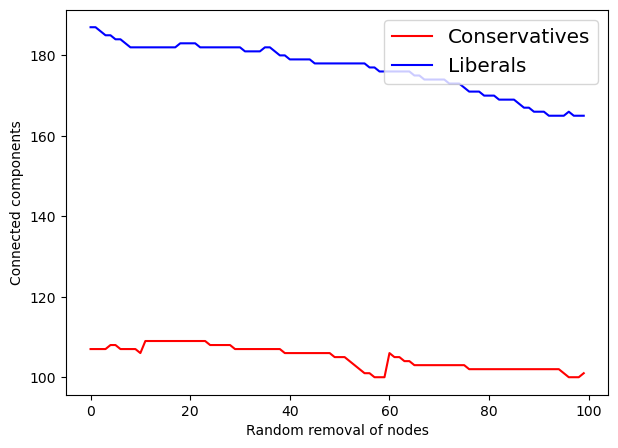

In [237]:
compare_linecharts(random_removal_conservatives, random_removal_liberals, 'Random removal of nodes')

In [238]:
conservatives_network = Network(
    name='conservatives',
    network=G_conservatives.copy()
)
conservatives_network.compute_metrics()

ordered_removal_conservatives = []

for i in range(100):
    conservatives_network.remove_nodes(1, random=False)
    ordered_removal_conservatives.append(conservatives_network.connected_components)

In [239]:
liberals_network = Network(
    name='liberals',
    network=G_liberals.copy()
)

liberals_network.compute_metrics()

ordered_removal_liberals = []

for i in range(100):
    liberals_network.remove_nodes(1, random=False)
    ordered_removal_liberals.append(liberals_network.connected_components)

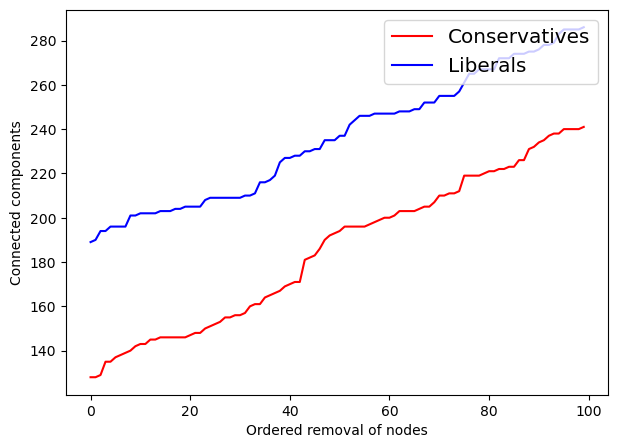

In [240]:
compare_linecharts(ordered_removal_conservatives, ordered_removal_liberals, 'Ordered removal of nodes')

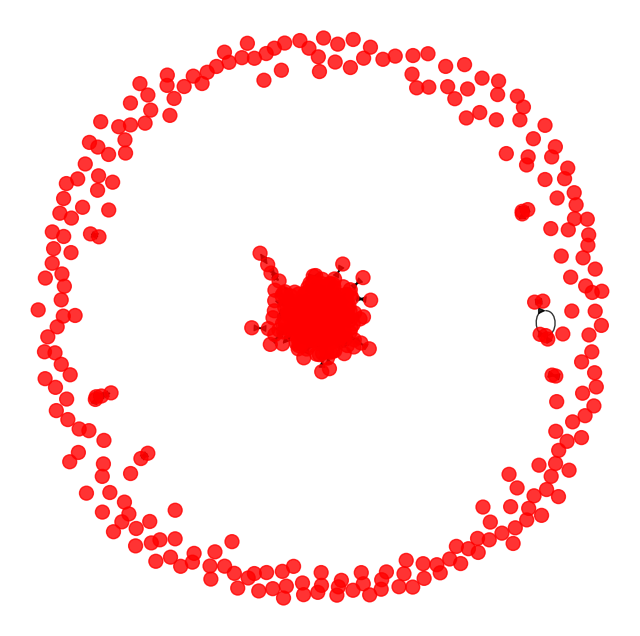

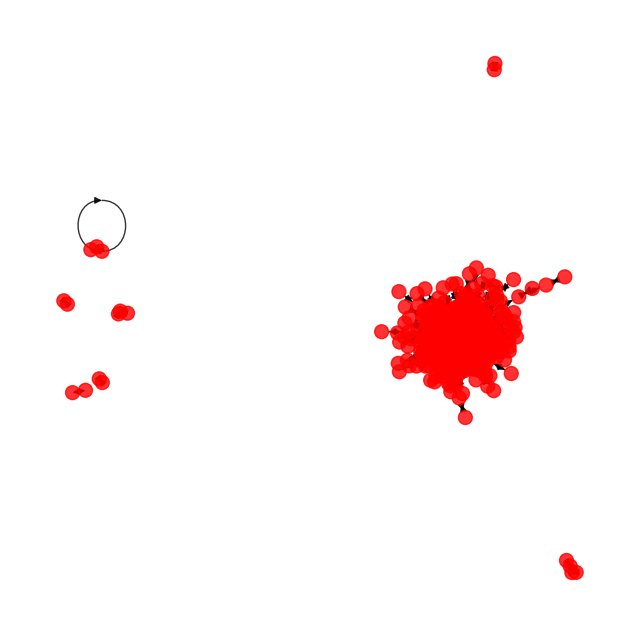

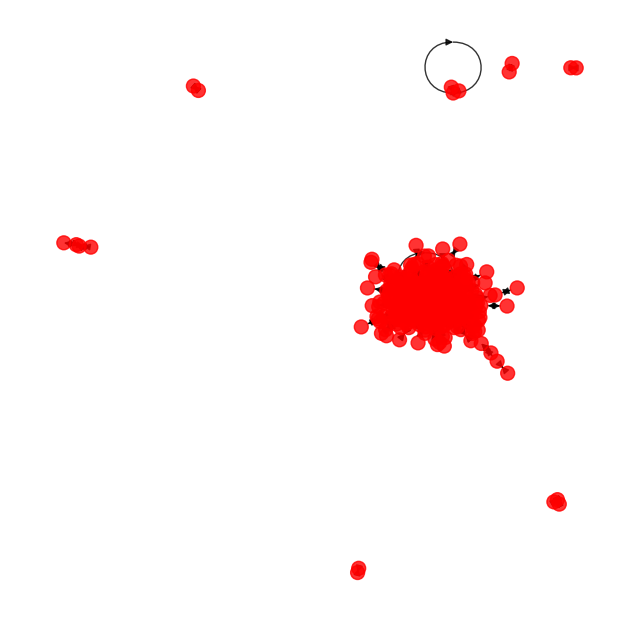

In [241]:
conservatives_network.initialize()
for i in range(3):
    conservatives_network.visualize()
    conservatives_network.update()

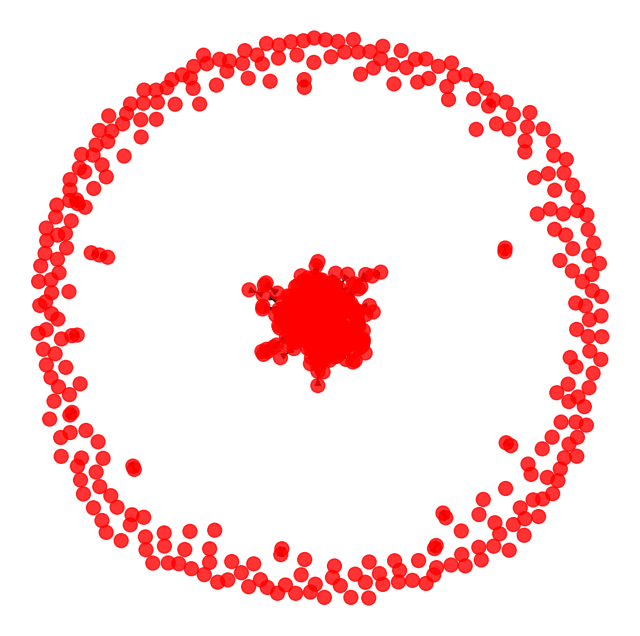

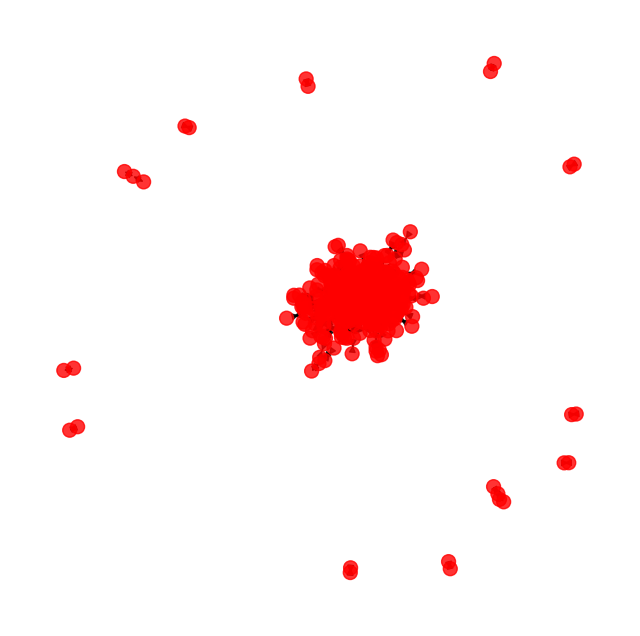

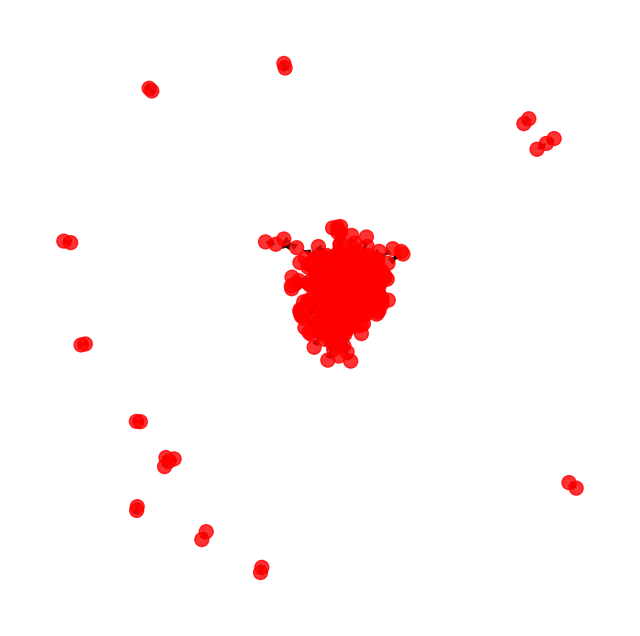

In [242]:
liberals_network.initialize()
for i in range(3):
    liberals_network.visualize()
    liberals_network.update()